In [1]:
# integrate singel cell IBEX

In [1]:
import os
import pandas as pd
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/')
import scanpy as sc
import anndata as ad

In [4]:
def concatenate_csv_files(directory):
    all_data = pd.DataFrame()
    renaming_mapping = {
    'HLA-DR_mean_intensity': 'HLADR_mean_intensity',
    'HLA-DR_max_intensity': 'HLADR_max_intensity', 
    'LYVE-1_mean_intensity':'LYVE1_mean_intensity' ,
    'LYVE-1_max_intensity':'LYVE1_max_intensity' ,
    'CHROMOGRANIN_A_mean_intensity': 'CHGA_mean_intensity',
    'CHROMOGRANIN_A_max_intensity': 'CHGA_max_intensity',
    'BETA-TUBULIN_3_mean_intensity': 'TUBB3_mean_intensity',
    'BETA-TUBULIN_3_max_intensity': 'TUBB3_max_intensity',
    'AQUAPORIN_1_mean_intensity': 'AQP1_mean_intensity',
    'AQUAPORIN_1_max_intensity': 'AQP1_max_intensity',
    'KI-67_mean_intensity': 'KI67_mean_intensity',
    'KI-67_max_intensity': 'KI67_max_intensity',
    'TCR_GAMMA/DELTA_mean_intensity': 'TCRGD_mean_intensity',
    'TCR_GAMMA/DELTA_max_intensity': 'TCRGD_max_intensity',
    'ALPHA_SMOOTH_MUSCLE_ACTIN_mean_intensity': 'ASMA_mean_intensity',
    'ALPHA_SMOOTH_MUSCLE_ACTIN_max_intensity': 'ASMA_max_intensity',
    'PAN-CYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PAN-CYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'BETATUB3_mean_intensity': 'TUBB3_mean_intensity',
    'BETATUB3_max_intensity': 'TUBB3_max_intensity',
    'BETATUBULIN3_mean_intensity': 'TUBB3_mean_intensity',
    'BETATUBULIN3_max_intensity': 'TUBB3_max_intensity',
    'MASKED_FOXP3_mean_intensity': 'FOXP3_mean_intensity',
    'MASKED_FOXP3_max_intensity': 'FOXP3_max_intensity',
    'CD8A_mean_intensity': 'CD8_mean_intensity',
    'CD8A_max_intensity': 'CD8_max_intensity',
    'BETA_TUB3_mean_intensity': 'TUBB3_mean_intensity',
    'BETA_TUB3_max_intensity': 'TUBB3_max_intensity',
    'SYNAPTOPHYSIN_mean_intensity': 'SYP_mean_intensity',
    'SYNAPTOPHYSIN_max_intensity': 'SYP_max_intensity',
    'SYNAPTOPHYSIN_D_mean_intensity': 'SYP_mean_intensity',
    'SYNAPTOPHYSIN_D_max_intensity': 'SYP_max_intensity',
    'PANCYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PANCYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'TCR_GD_mean_intensity':'TCRGD_mean_intensity',
    'TCR_GD_max_intensity':'TCRGD_max_intensity',
    'PAN_CYTOKERATIN_mean_intensity': 'PANCYTO_mean_intensity',
    'PAN_CYTOKERATIN_max_intensity': 'PANCYTO_max_intensity',
    'ANNEXIN_I_mean_intensity': 'ANNEXIN1_mean_intensity',
    'ANNEXIN_I_max_intensity': 'ANNEXIN1_max_intensity',
    'ANNEXIN_1_mean_intensity': 'ANNEXIN1_mean_intensity',
    'ANNEXIN_1_max_intensity': 'ANNEXIN1_max_intensity',
    # 'CD15_0_mean_intensity': 'CD15_mean_intensity',
    # 'CD15_0_max_intensity': 'CD15_max_intensity',
}

    

    # Walk through directory
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            # Check if file is the target CSV file
            if filename == 'channel_data_3d_anno.csv':
                file_path = os.path.join(dirpath, filename)

                # Load CSV file into DataFrame
                data = pd.read_csv(file_path)

                # Rename columns
                data = data.rename(columns=renaming_mapping)
                
                # Add 'sample' column with the parent directory name
                data['sample'] = os.path.basename(dirpath)
                
                 # Generate a new index by concatenating 'sample', 'spot_id' and the original row index
                data['index'] = data.apply(lambda row: f"{row['sample']}_{row['label']}_{row.name}", axis=1)
                data.set_index('index', inplace=True)


                # Concatenate DataFrame along rows
                all_data = pd.concat([all_data, data], axis=0)

    return all_data

# Replace with your directory path
directory = '/nfs/team205/ny1/IBEX/Thymus/'
all_data = concatenate_csv_files(directory)

# Save to a new CSV file
all_data.to_csv('all_data.csv', index=False)

print("All data has been concatenated and saved to all_data.csv.")

KeyboardInterrupt: 

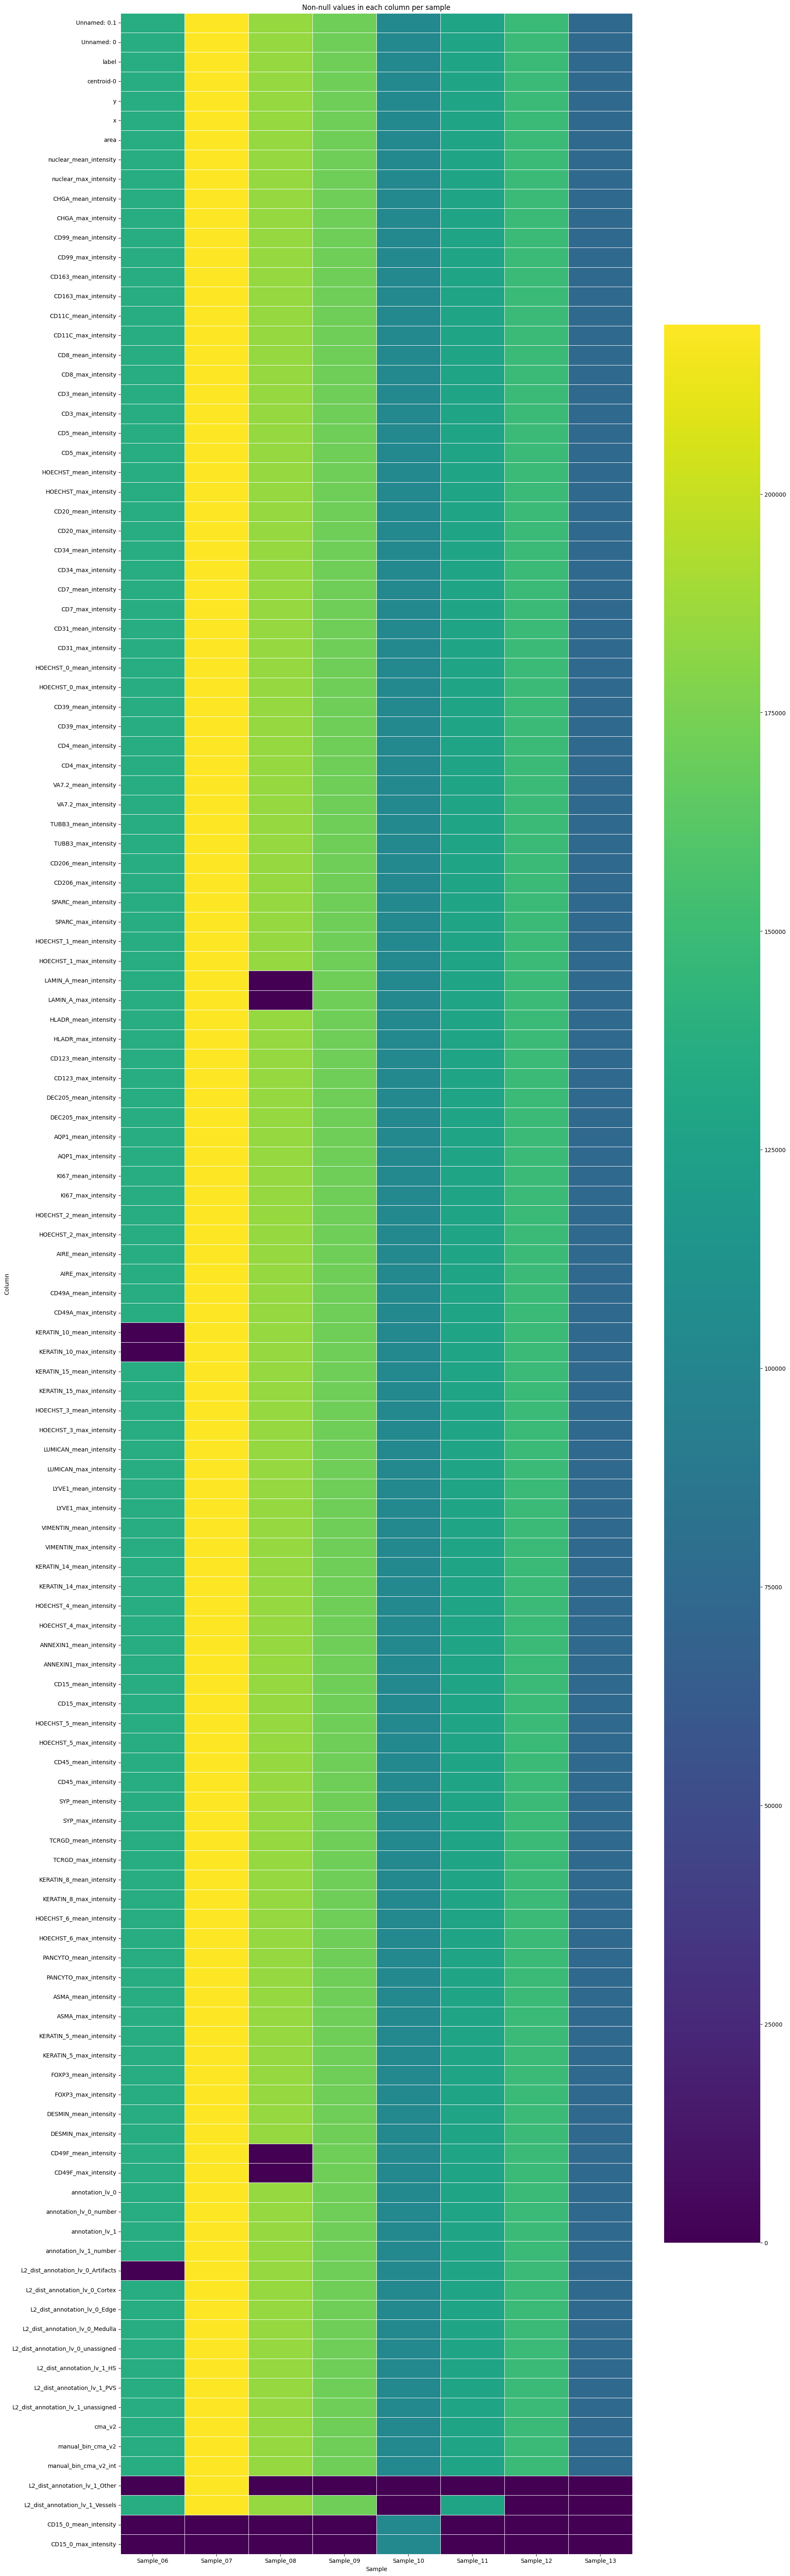

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
non_null_counts = all_data.groupby('sample').count()
plt.figure(figsize=(20,80))
sns.heatmap(non_null_counts.T, cmap='viridis', linewidths=.5)
plt.title('Non-null values in each column per sample')
plt.xlabel('Sample')
plt.ylabel('Column')
plt.savefig('marker_compositionsingle_cells.pdf')
plt.show()



In [7]:
all_data

Unnamed: 0.1  Unnamed: 0    label  centroid-0  \
index                                                                     
Sample_13_22_0                       0           0       22    2.452939   
Sample_13_29_1                       1           1       29    0.768984   
Sample_13_35_2                       2           2       35    0.886432   
Sample_13_44_3                       3           3       44    1.673354   
Sample_13_53_4                       4           4       53    0.791155   
...                                ...         ...      ...         ...   
Sample_10_1225204_102892        102892      102892  1225204    4.942857   
Sample_10_1225217_102893        102893      102893  1225217    5.009079   
Sample_10_1225271_102894        102894      102894  1225271    4.894394   
Sample_10_1225311_102895        102895      102895  1225311    5.052885   
Sample_10_1225349_102896        102896      102896  1225349    4.826291   

                                    y             x  area  \
index                                                       
Sample_13_22_0            4183.859479   1815.405214  2263   
Sample_13_29_1            4200.971123   1820.008556   935   
Sample_13_35_2            4224.137688   1801.804020   995   
Sample_13_44_3            4243.145455   1810.591850  1595   
Sample_13_53_4            4262.280098   1820.176904   814   
...                               ...           ...   ...   
Sample_10_1225204_102892  7063.734857  15690.308571   875   
Sample_10_1225217_102893  7168.478599  15725.404669   771   
Sample_10_1225271_102894  6736.653194  15722.198175   767   
Sample_10_1225311_102895  6931.674279  15726.984375   832   
Sample_10_1225349_102896  7024.507042  15847.235915   852   

                          nuclear_mean_intensity  nuclear_max_intensity  \
index                                                                     
Sample_13_22_0                         59.279275                  187.0   
Sample_13_29_1                         67.916578                  189.0   
Sample_13_35_2                         68.652261                  148.0   
Sample_13_44_3                         77.223824                  196.0   
Sample_13_53_4                         86.152334                  189.0   
...                                          ...                    ...   
Sample_10_1225204_102892               74.043429                  189.0   
Sample_10_1225217_102893               81.032425                  169.0   
Sample_10_1225271_102894               80.346806                  205.0   
Sample_10_1225311_102895               81.944712                  183.0   
Sample_10_1225349_102896               61.715962                  146.0   

                          CHGA_mean_intensity  ...  \
index                                          ...   
Sample_13_22_0                       0.188688  ...   
Sample_13_29_1                       0.053476  ...   
Sample_13_35_2                       0.077387  ...   
Sample_13_44_3                       0.034483  ...   
Sample_13_53_4                       0.073710  ...   
...                                       ...  ...   
Sample_10_1225204_102892             0.104000  ...   
Sample_10_1225217_102893             0.041505  ...   
Sample_10_1225271_102894             0.138201  ...   
Sample_10_1225311_102895             0.049279  ...   
Sample_10_1225349_102896             0.043427  ...   

                          L2_dist_annotation_lv_1_PVS  \
index                                                   
Sample_13_22_0                             285.221537   
Sample_13_29_1                             285.221537   
Sample_13_35_2                             289.053104   
Sample_13_44_3                             280.884108   
Sample_13_53_4                             280.884108   
...                                               ...   
Sample_10_1225204_102892                   544.212457   
Sample_10_1225217_102893                   554.727257   
Sample_

In [8]:
import pandas as pd
import numpy as np

# Meta columns
meta_cols = ['label','y','x','Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number',  'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int']

# Intensity columns
intensity_cols = [col for col in all_data.columns if col.endswith('mean_intensity') or col.endswith('max_intensity')]
all_data = all_data[all_data['annotation_lv_0']!='unassigned']
all_data = all_data[all_data['annotation_lv_0']!='Artifacts']

adata_ibex = ad.AnnData(X= all_data.loc[:,intensity_cols],obs=all_data.loc[:,meta_cols],)

adata_ibex.var.index = adata_ibex.var.index.str.replace('_intensity', '')
# Get the list of gene names that does not contain the strings "max", "intensity", and "Hoechst"
genes_to_keep = [gene for gene in adata_ibex.var_names 
                 if all(x not in gene for x in ['max', 'HOECHST'])]

# Subset the AnnData object to only include the genes in genes_to_keep
adata_ibex = adata_ibex[:, genes_to_keep]
adata_ibex.layers['counts'] = adata_ibex.X
adata_ibex

/tmp/ipykernel_1401/3894628464.py:12: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_ibex = ad.AnnData(X= all_data.loc[:,intensity_cols],obs=all_data.loc[:,meta_cols],)


AnnData object with n_obs × n_vars = 1101631 × 45
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int'
    layers: 'counts'

In [10]:
list(adata_ibex.obs.columns)

['label',
 'y',
 'x',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'sample',
 'annotation_lv_0',
 'annotation_lv_0_number',
 'annotation_lv_1',
 'annotation_lv_1_number',
 'L2_dist_annotation_lv_0_Cortex',
 'L2_dist_annotation_lv_0_Edge',
 'L2_dist_annotation_lv_0_Medulla',
 'L2_dist_annotation_lv_1_HS',
 'L2_dist_annotation_lv_1_Other',
 'L2_dist_annotation_lv_1_PVS',
 'L2_dist_annotation_lv_1_Vessels',
 'L2_dist_annotation_lv_1_unassigned',
 'cma_v2',
 'manual_bin_cma_v2',
 'manual_bin_cma_v2_int']

In [11]:
# specify the colors for your categories
# color mapping
colors_dict = {'unassigned': 'gray', 'PVS': 'red', 'HS': 'green', 'vessels': 'blue', 'lymph':'red','Cortex': 'cyan', 'Medulla': 'green', 'Edge': 'brown', 'Artifacts': 'black'}


adata_ibex.obs['annotation_lv_0'] = adata_ibex.obs['annotation_lv_0'].astype('category')
# get the categories in your data
categories = adata_ibex.obs['annotation_lv_0'].cat.categories

# map the colors to the categories
colors = []
for cat in categories:
    try:
        colors.append(colors_dict[cat])
    except KeyError:  # cat is not found in colors_dict
        colors.append('gray')  # use a default color

# assign the colors
adata_ibex.uns['annotation_lv_0_colors'] = colors

adata_ibex.obs['annotation_lv_1'] = adata_ibex.obs['annotation_lv_1'].astype('category')

# get the categories in your data
categories = adata_ibex.obs['annotation_lv_1'].cat.categories

# map the colors to the categories
colors = []
for cat in categories:
    try:
        colors.append(colors_dict[cat])
    except KeyError:  # cat is not found in colors_dict
        colors.append('gray')  # use a default color

# assign the colors
adata_ibex.uns['annotation_lv_1_colors'] = colors



In [14]:
# Convert to a dense matrix if it's not already
adata_ibex.X = np.nan_to_num(adata_ibex.X)
sc.pp.filter_genes(adata_ibex,min_cells=500000)
adata_ibex.var_names

Index(['nuclear_mean', 'CHGA_mean', 'CD99_mean', 'CD163_mean', 'CD11C_mean',
       'CD8_mean', 'CD3_mean', 'CD5_mean', 'CD20_mean', 'CD34_mean',
       'CD7_mean', 'CD31_mean', 'CD39_mean', 'CD4_mean', 'VA7.2_mean',
       'TUBB3_mean', 'CD206_mean', 'SPARC_mean', 'LAMIN_A_mean', 'HLADR_mean',
       'CD123_mean', 'DEC205_mean', 'AQP1_mean', 'KI67_mean', 'AIRE_mean',
       'CD49A_mean', 'KERATIN_10_mean', 'KERATIN_15_mean', 'LUMICAN_mean',
       'LYVE1_mean', 'VIMENTIN_mean', 'KERATIN_14_mean', 'ANNEXIN1_mean',
       'CD15_mean', 'CD45_mean', 'SYP_mean', 'TCRGD_mean', 'KERATIN_8_mean',
       'PANCYTO_mean', 'ASMA_mean', 'KERATIN_5_mean', 'FOXP3_mean',
       'DESMIN_mean', 'CD49F_mean'],
      dtype='object')

In [15]:
# add metadta 
import pandas as pd

# Load metadata from CSV file
metadata = pd.read_csv('/nfs/team205/ny1/playground/iss_patcher/HTSA_All_Spatial_Data_v3 - IBEX_simple.csv')

# Set 'sample' column as index
metadata.set_index('SangerID', inplace=True)
metadata

# merge new annotations
adata_ibex.obs = adata_ibex.obs.join(metadata, on='sample')
adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex'
    var: 'n_cells'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

# plot individual sample composition in umap and PCA space 

In [16]:
# sc.set_figure_params(figsize=[4,4],fontsize=10,dpi=100)
# for s in np.unique(adata_ibex.obs['sample']):
#     adata = adata_ibex[adata_ibex.obs['sample']==s].copy()
# #     sc.pp.normalize_total(adata)
# #     sc.pp.log1p(adata)
#     sc.pp.neighbors(adata)
#     sc.tl.umap(adata)
#     sc.pl.umap(adata, color = ['cma_v2','annotation_lv_0','annotation_lv_1']
#            , title = s, frameon = False, cmap = 'gist_rainbow',save='_IBEX_sample_id'+s+'.pdf',s=40,vmin=-0.8,vmax=0.8)

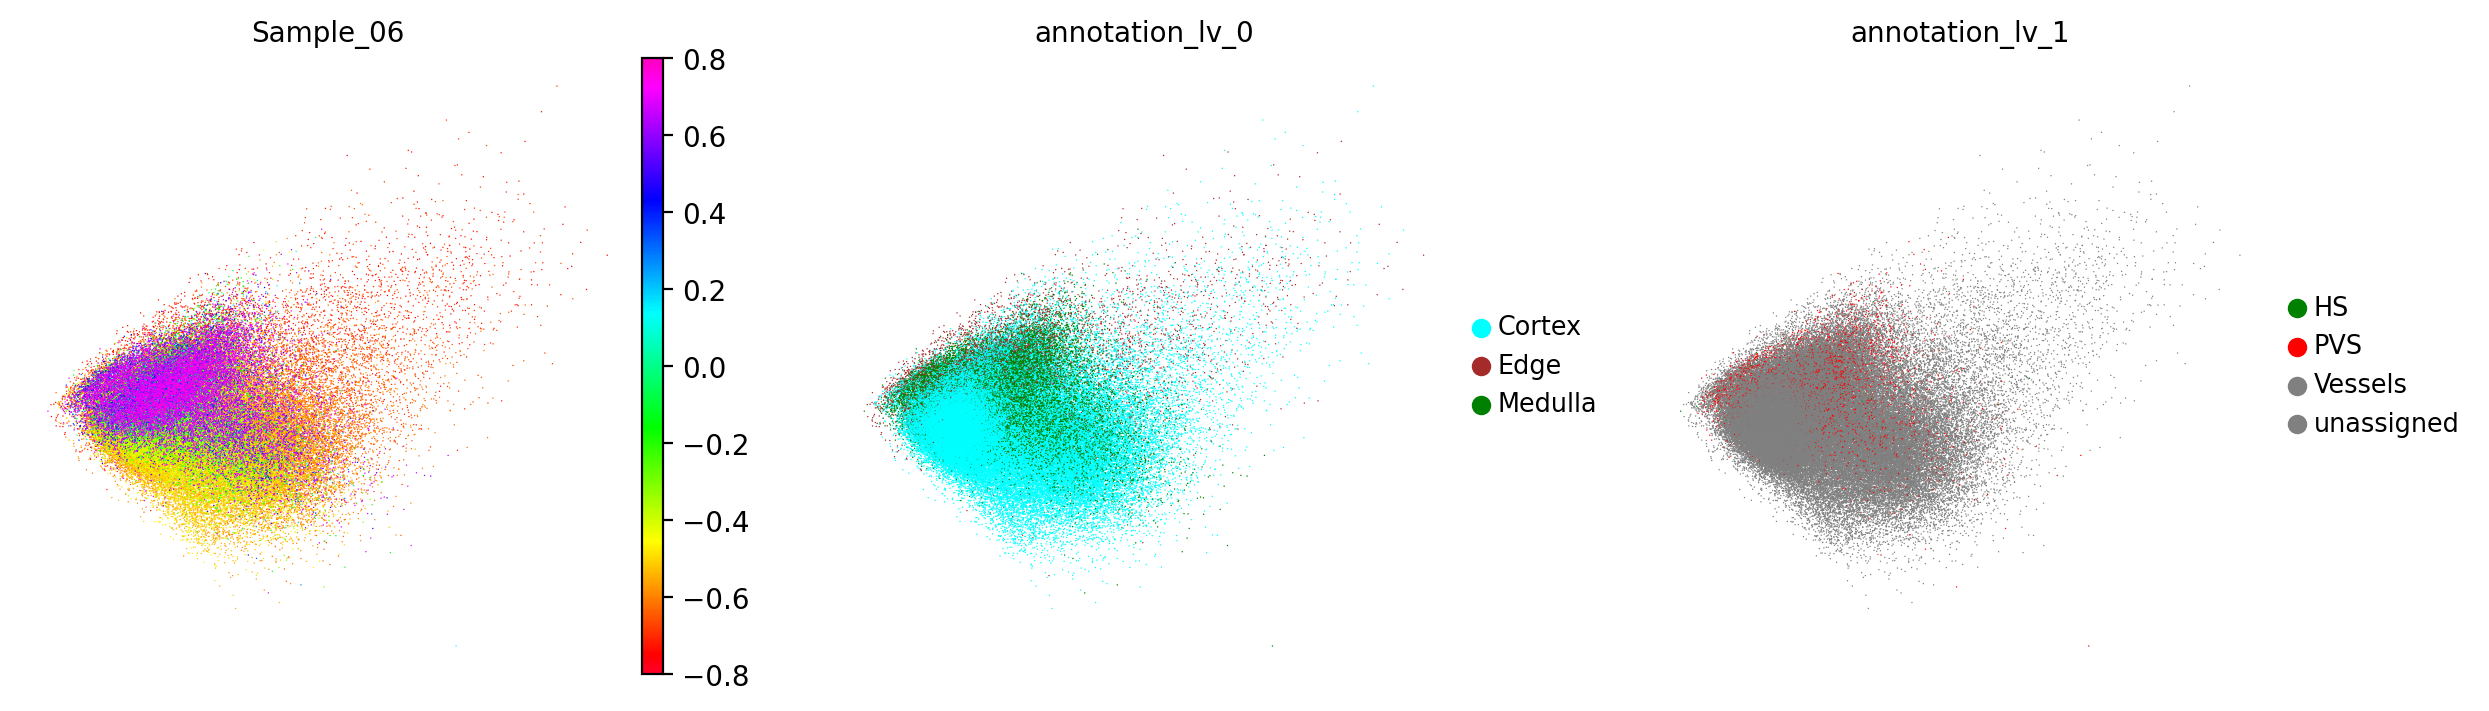

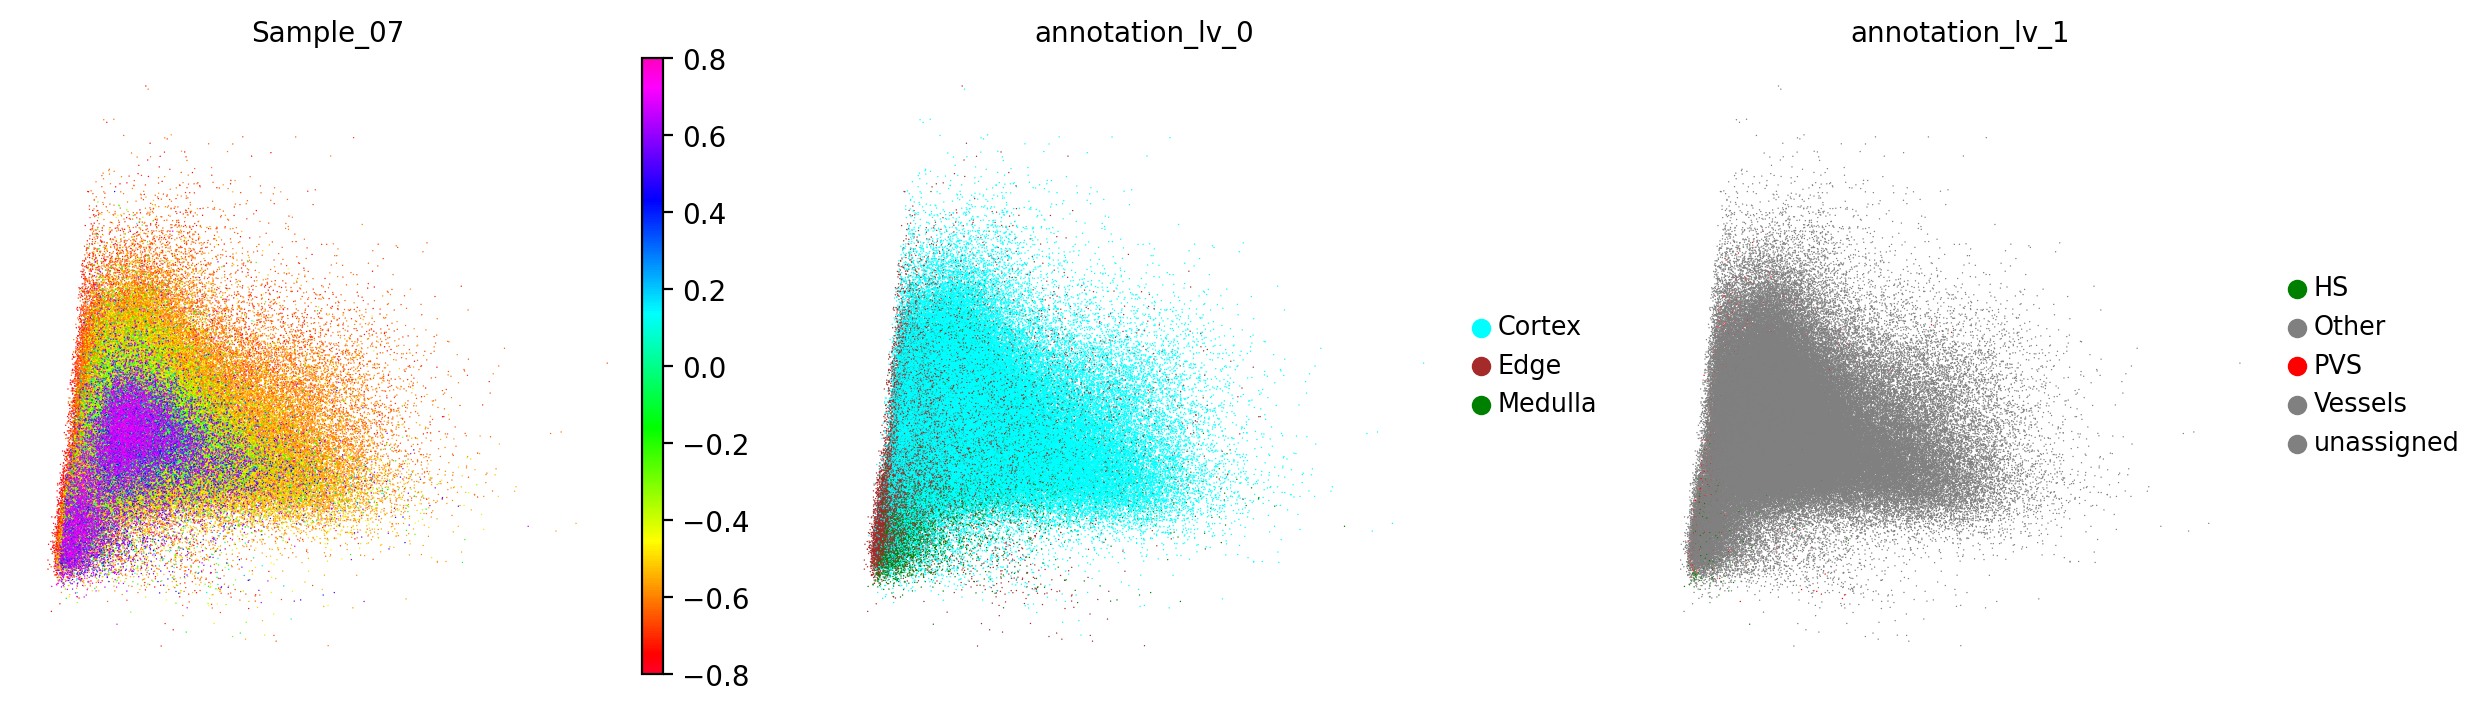

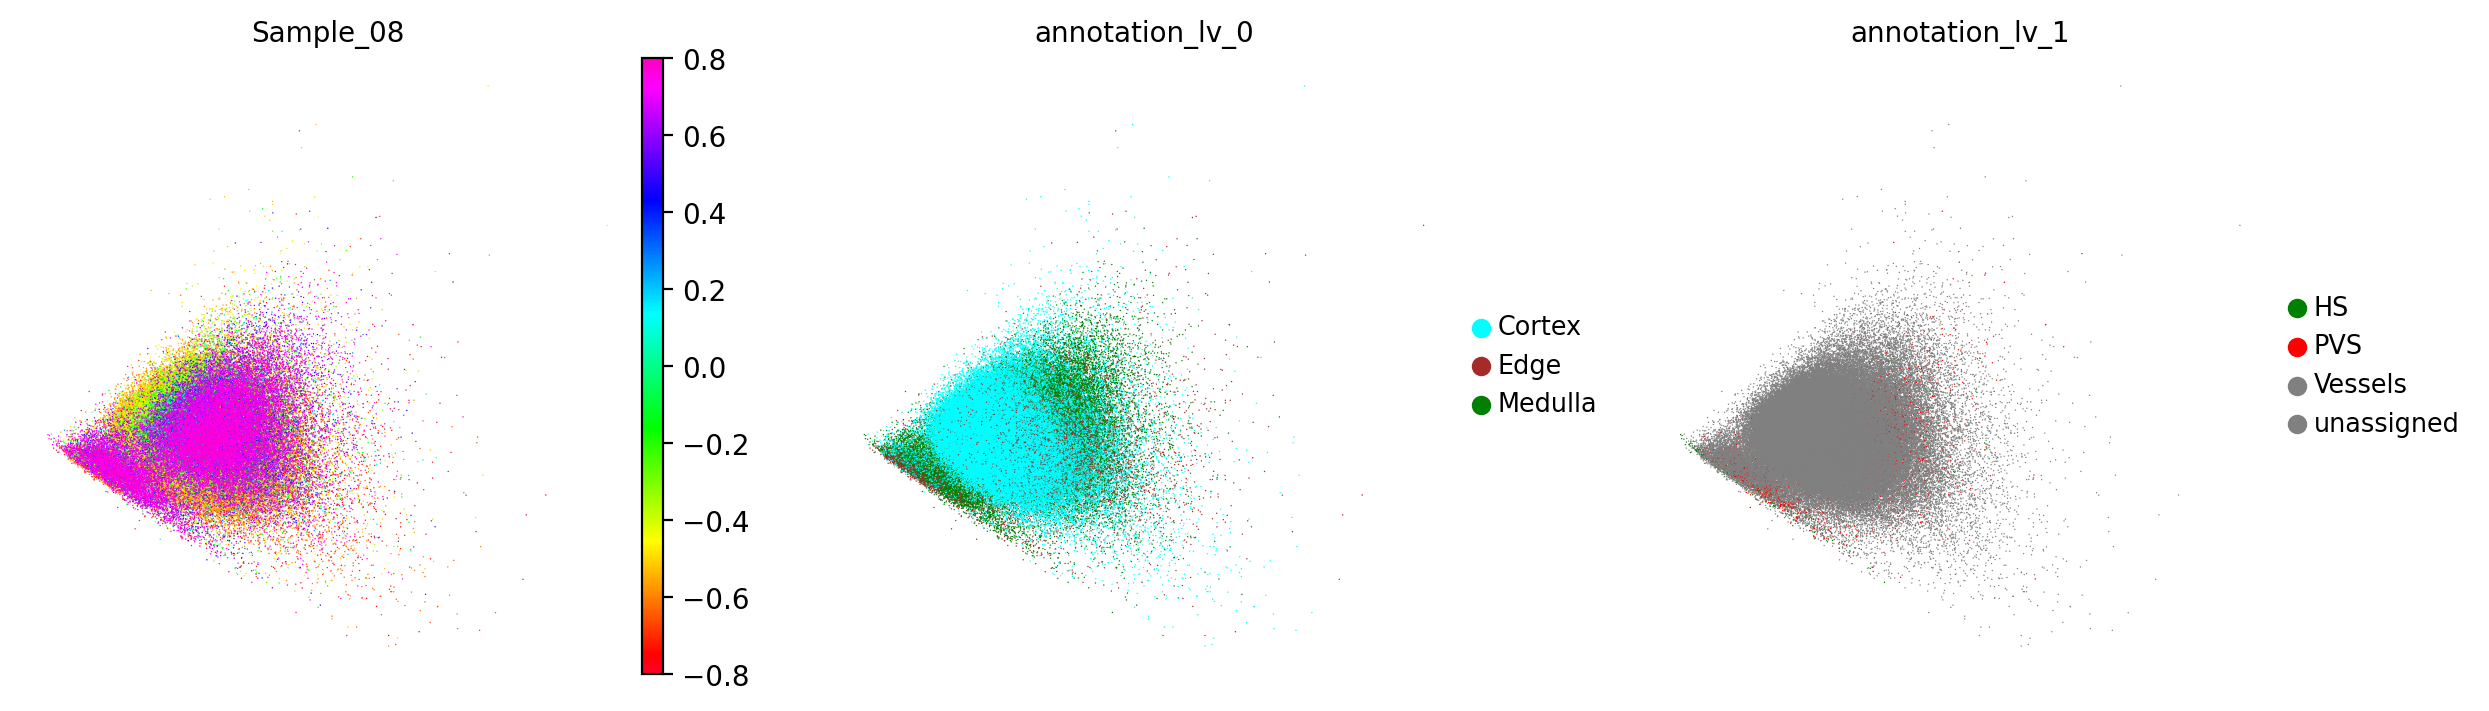

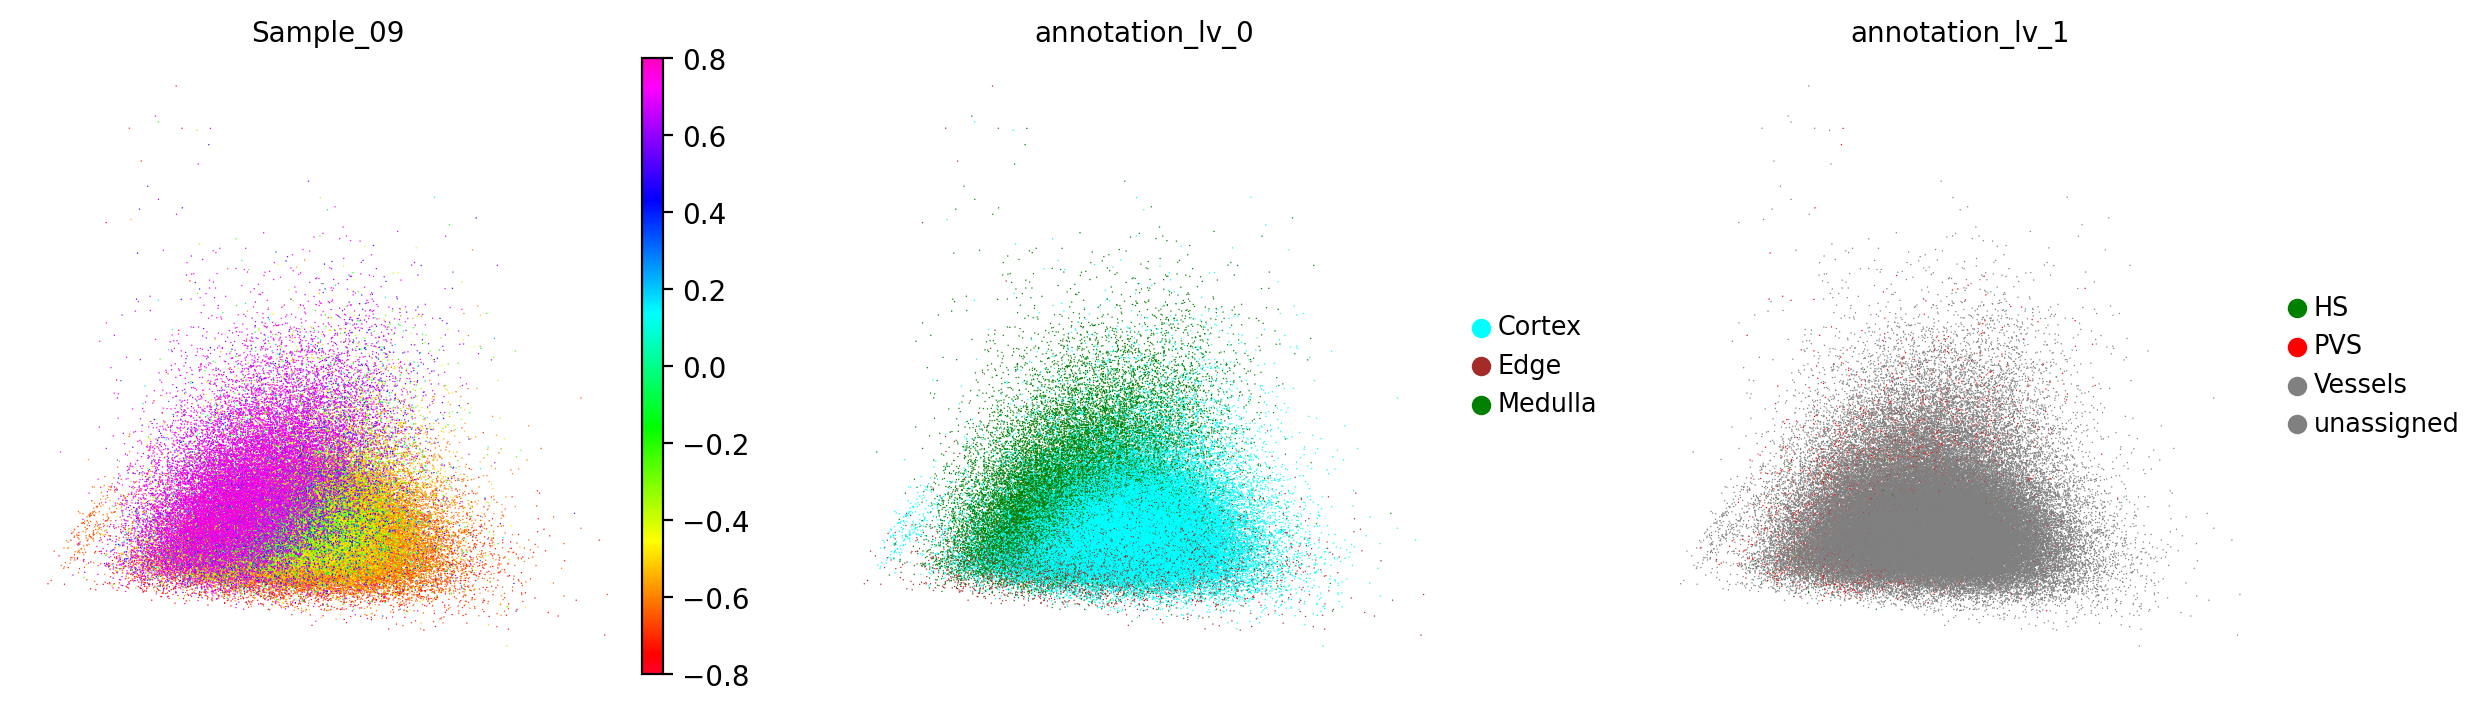

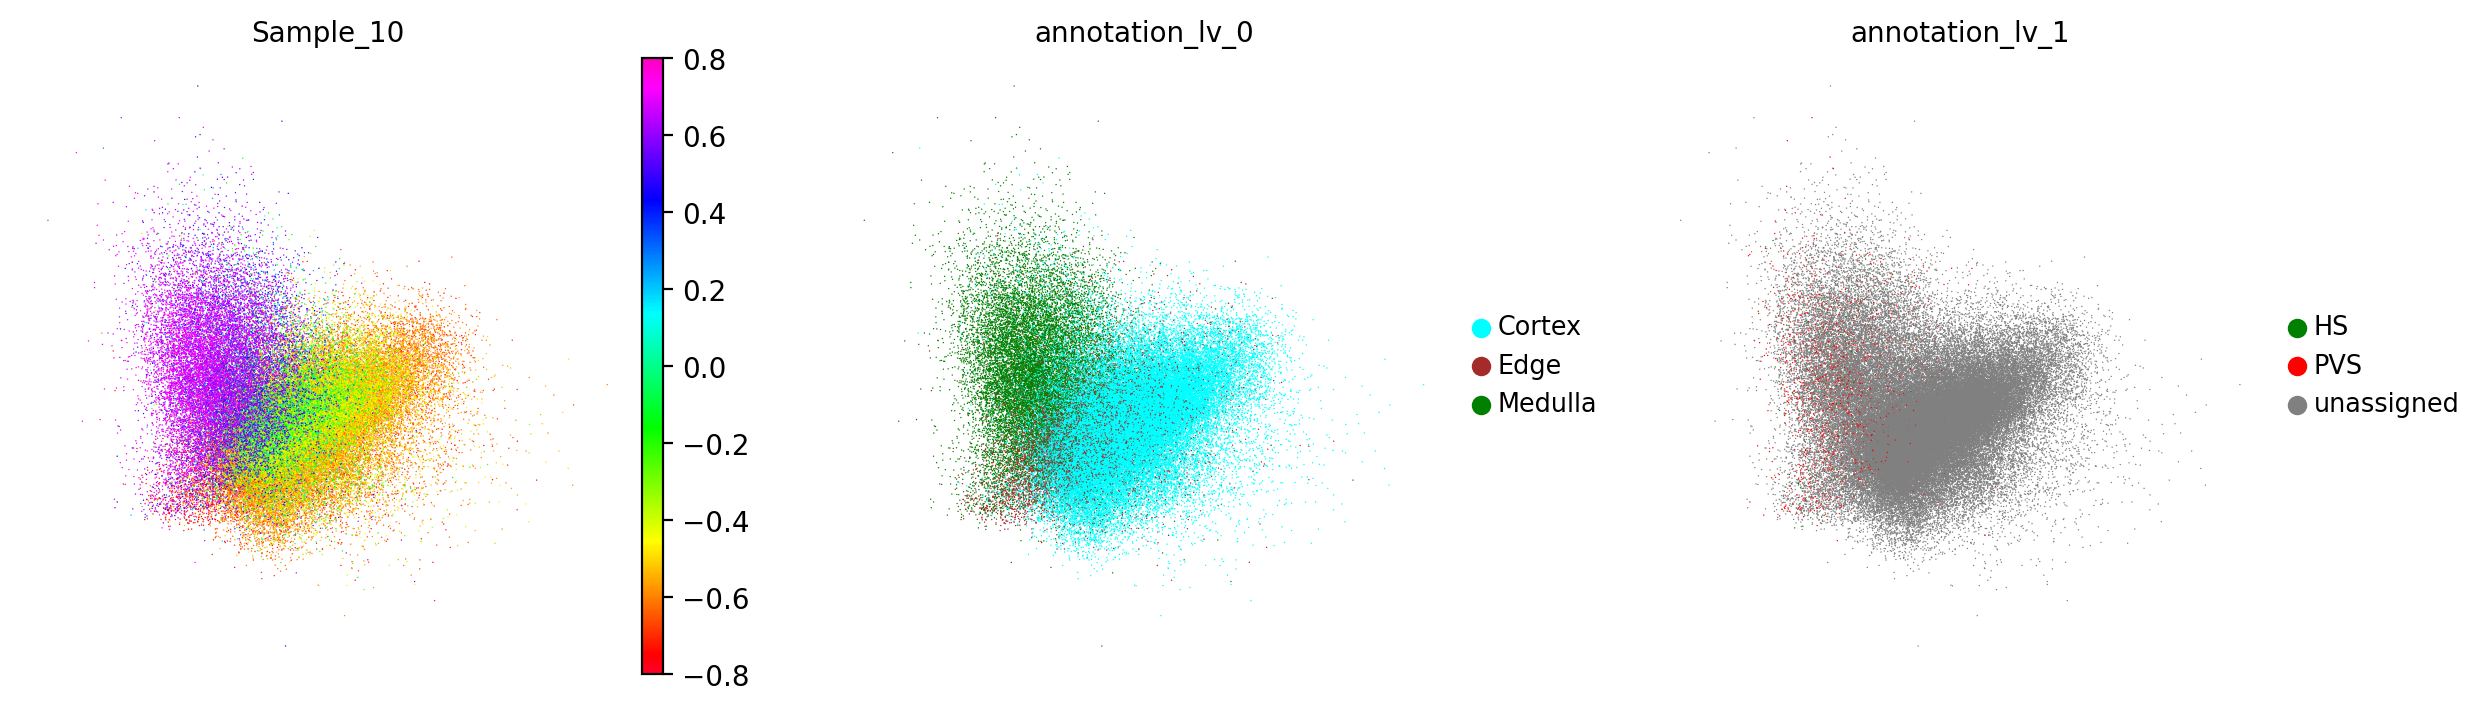

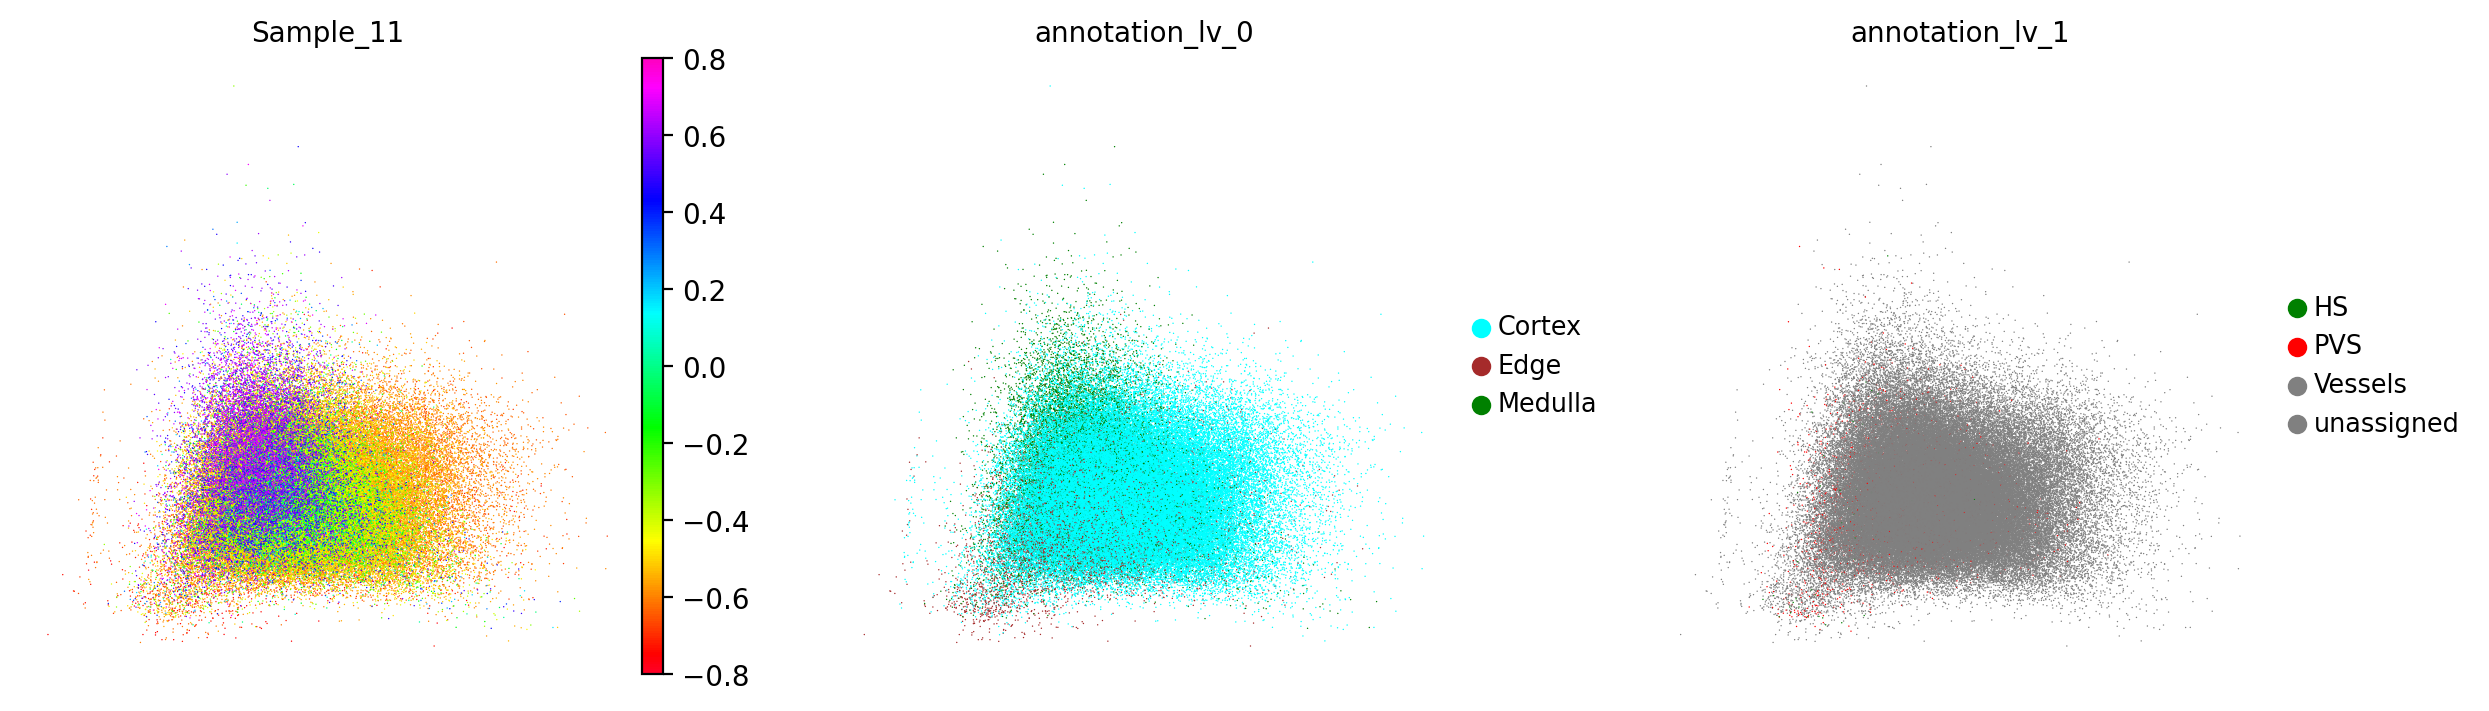

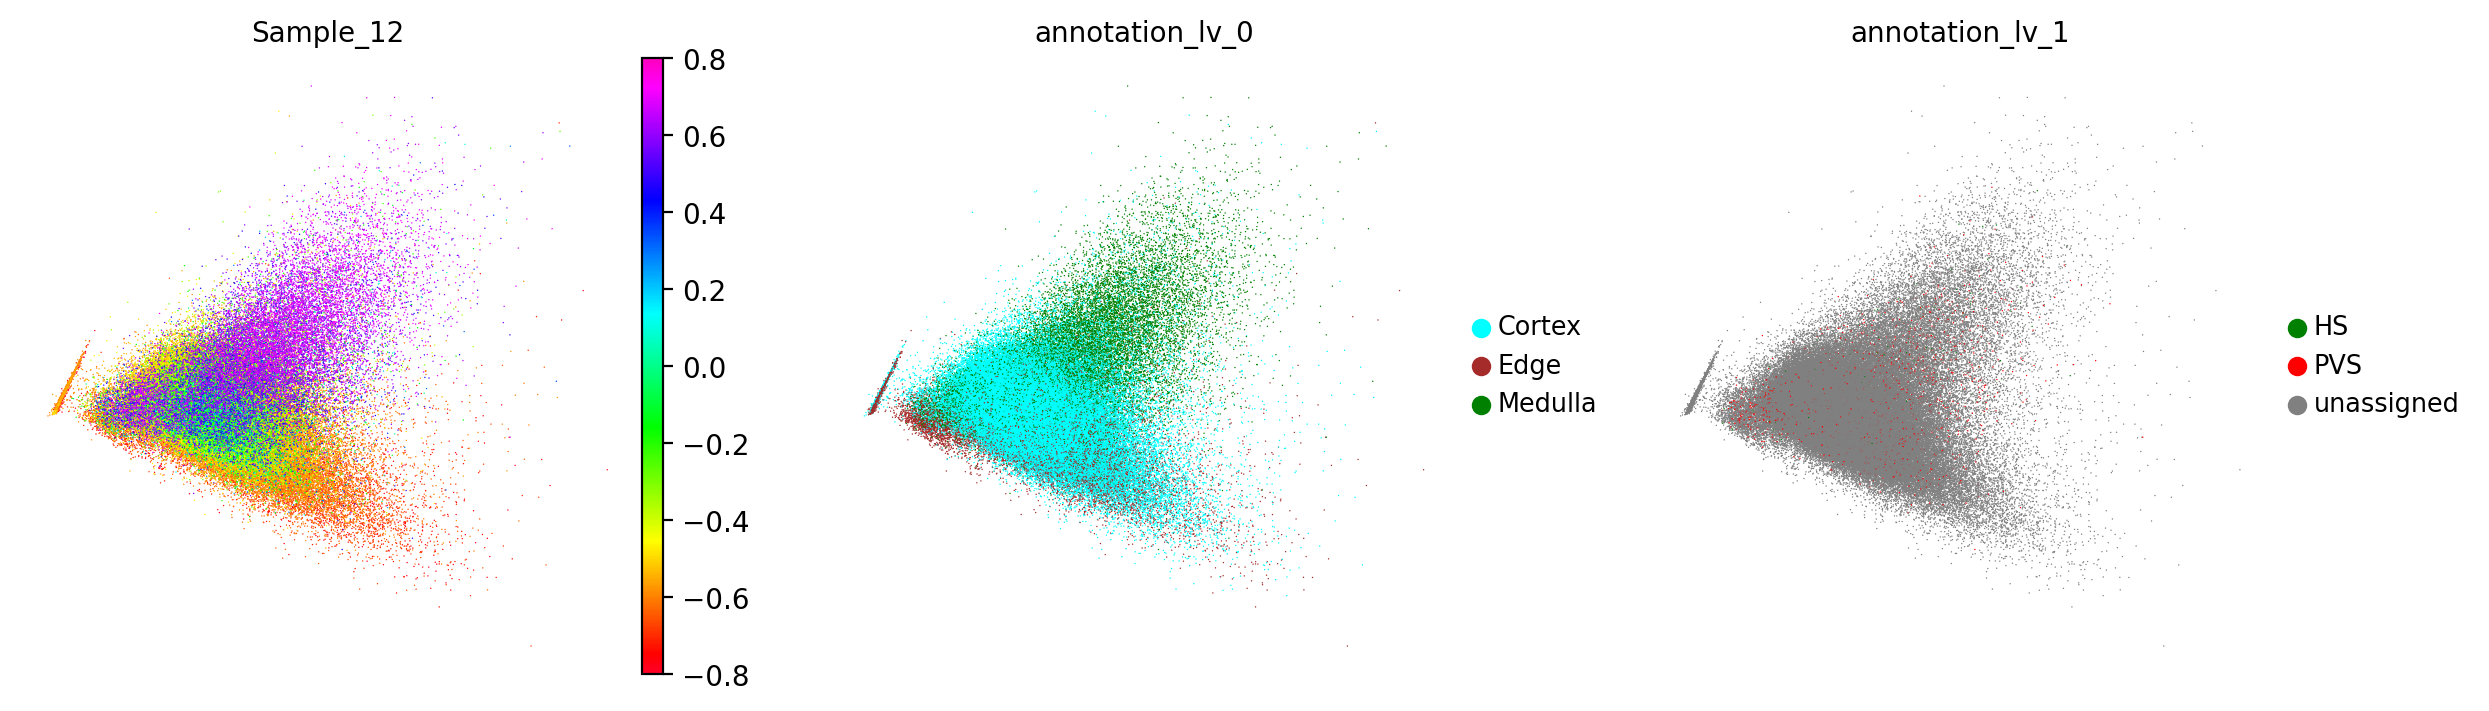

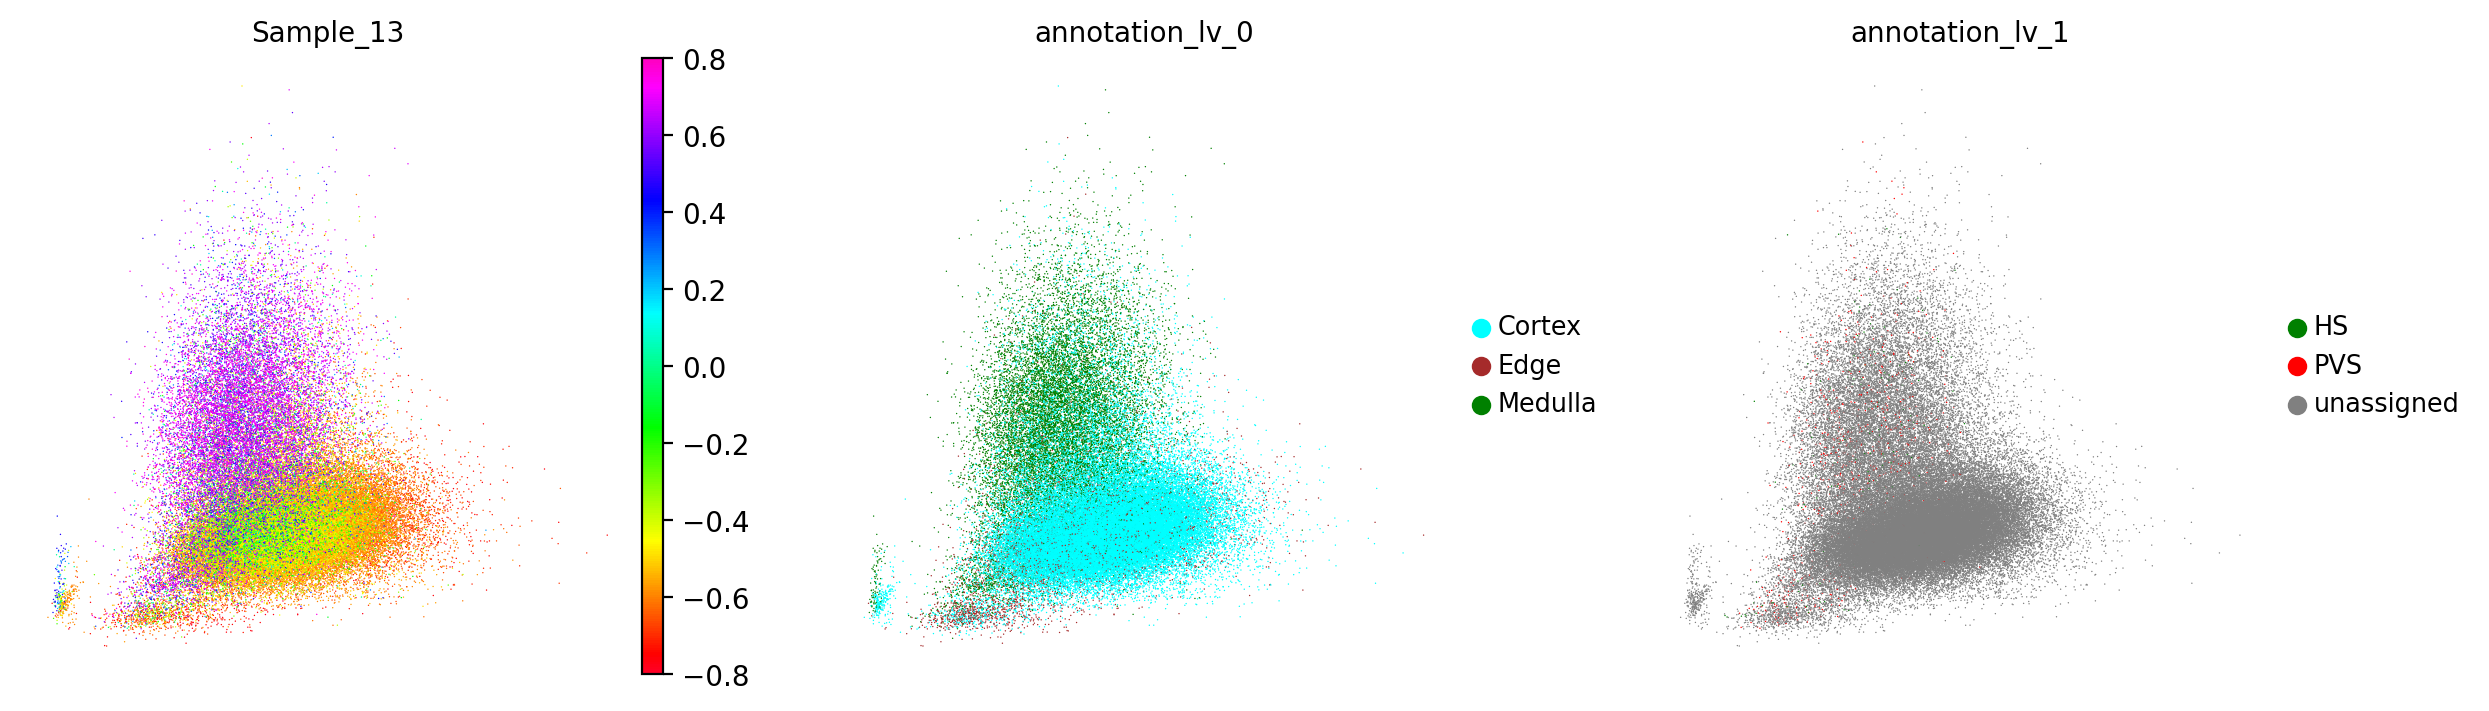

In [19]:
sc.set_figure_params(figsize=[4,4],fontsize=10,dpi=100)

for s in np.unique(adata_ibex.obs['sample']):
    adata = adata_ibex[adata_ibex.obs['sample']==s].copy()
#     sc.pp.normalize_per_cell(adata)
#     sc.pp.log1p(adata)
    adata.X = np.nan_to_num(adata.X)

    sc.pp.pca(adata)
    sc.pl.pca(adata, color = ['cma_v2','annotation_lv_0','annotation_lv_1']
           , title = s, frameon = False, cmap = 'gist_rainbow',save='_IBEX_sc_sample_id'+s+'.pdf',s=1,vmin=-0.8,vmax=0.8)


In [71]:
os.chdir('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/')
# adata_ibex.write_h5ad('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/adata_sc_IBEX.h5ad')
adata_ibex = sc.read_h5ad('/nfs/team205/ny1/ThymusSpatialAtlas/Figure2/adata_sc_IBEX.h5ad')
import numpy as np
adata_ibex.obs['total_counts'] = np.sum(adata_ibex.X,axis=1)

adata_ibex

AnnData object with n_obs × n_vars = 1101631 × 44
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'Sample', 'Alt. ID', 'Age', 'Age_Numeric', 'Sex', 'total_counts'
    var: 'n_cells'
    uns: 'annotation_lv_0_colors', 'annotation_lv_1_colors'
    layers: 'counts'

In [72]:
sc.pp.subsample(adata_ibex,fraction=0.1)

# correlations with axis 

In [73]:
# batch correction
sc.pp.normalize_total(adata_ibex,target_sum=200)

sc.pp.combat(adata_ibex, key='sample', inplace=True)
# sc.pp.log1p(adata_ibex)



/home/jovyan/my-conda-envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [74]:
# pca
adata_ibex.X = np.nan_to_num(adata_ibex.X)
sc.pp.pca(adata_ibex, n_comps = 10)

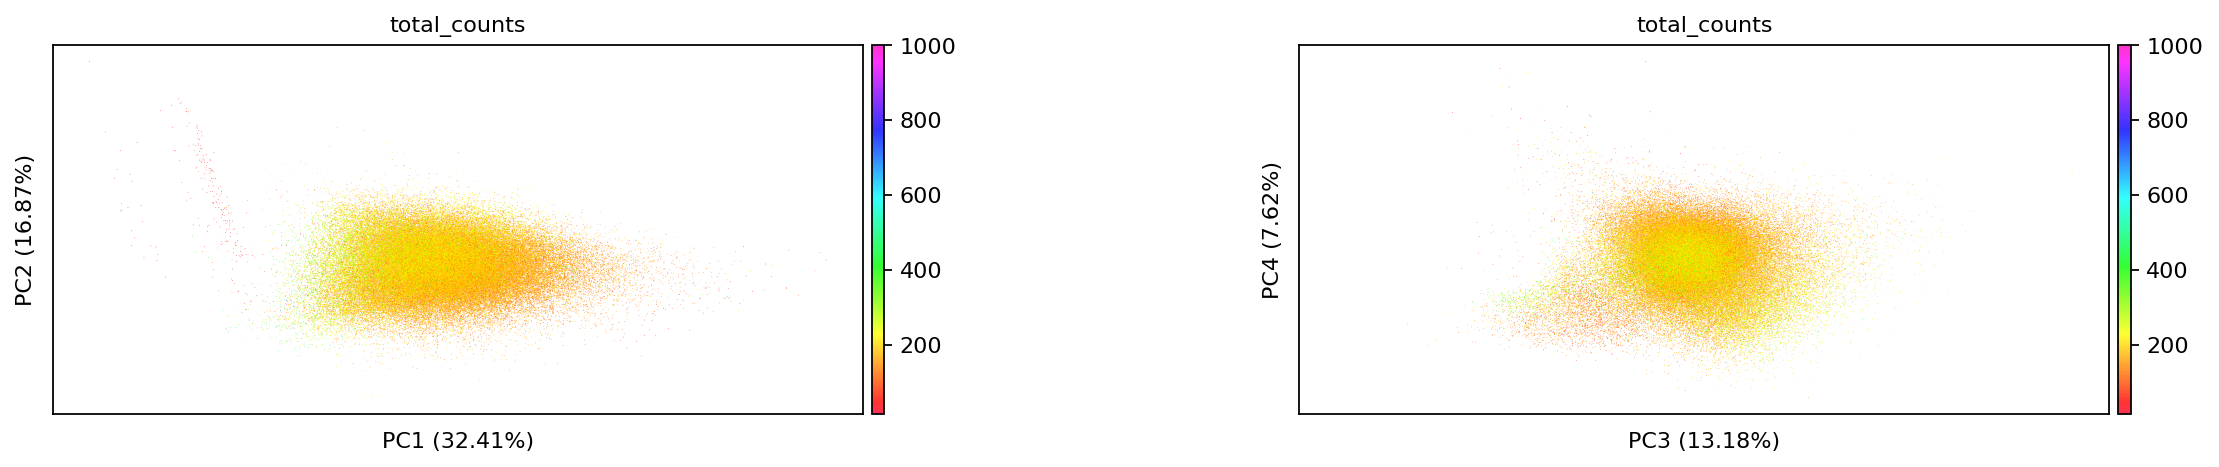

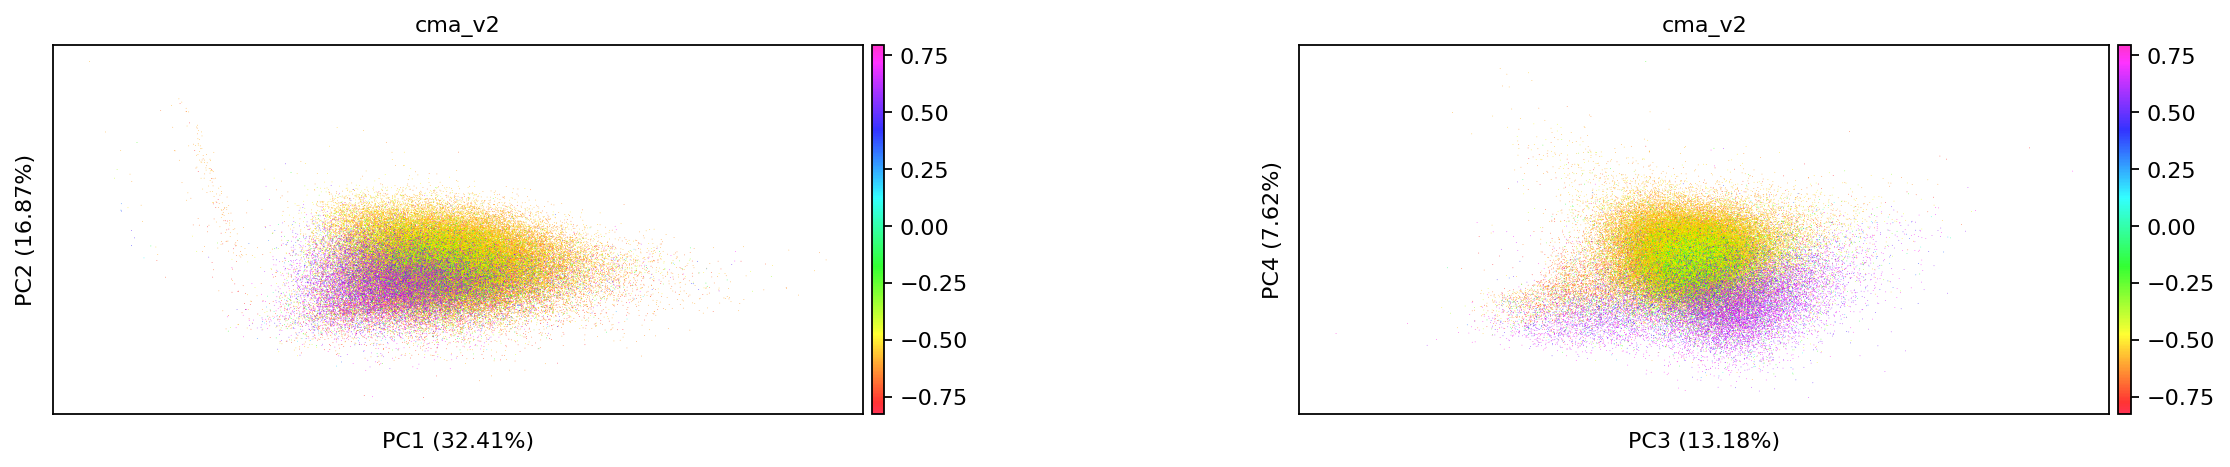

In [75]:
# plot pca 
sc.pl.pca(adata_ibex, components = ['1,2', '3,4'], color = ['total_counts'], ncols = 2, cmap = "gist_rainbow",s=0.5,alpha=0.8,annotate_var_explained=True,wspace=0.4)
sc.pl.pca(adata_ibex, components = ['1,2', '3,4'], color = ['cma_v2'], ncols = 2, cmap = "gist_rainbow",s=0.5,alpha=0.8,annotate_var_explained=True,wspace=0.4)

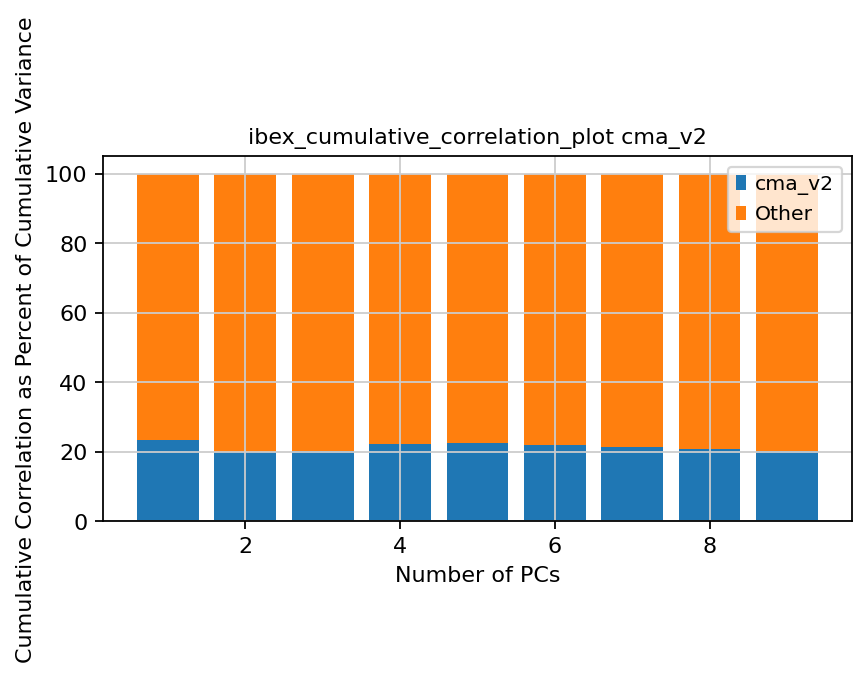

In [76]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sc.set_figure_params(figsize=[6,3],fontsize=10)

# Define the observation name
obs_name1 = "cma_v2"  # replace with your observation name

# Get the values of the observation
obs_values1 = adata_ibex.obs[obs_name1]

# Initialize variables to store the cumulative correlation and variance
cumulative_corr1 = 0
cumulative_variance = 0

# Initialize lists to store cumulative correlation as percent of cumulative variance
cum_corr_pct1 = []

# Calculate correlation with each PC
for i in range(9):
    pc_values = adata_ibex.obsm['X_pca'][:, i]

    # Pearson correlation
    corr1, _ = spearmanr(obs_values1, pc_values)

    # Get variance explained by this PC
    explained_variance = adata_ibex.uns['pca']['variance_ratio'][i]

    # Add weighted correlation and variance to cumulative measures
    cumulative_corr1 += np.abs(corr1) * explained_variance
    cumulative_variance += explained_variance

    # Store cumulative correlation as percent of cumulative variance
    cum_corr_pct1.append(100*cumulative_corr1/cumulative_variance)

# Create a stacked bar plot
plt.bar(range(1, 10), cum_corr_pct1, label=obs_name1)
plt.bar(range(1, 10), [100 - pct for pct in cum_corr_pct1], bottom=cum_corr_pct1, label='Other')
plt.title('ibex_cumulative_correlation_plot cma_v2')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Correlation as Percent of Cumulative Variance')
plt.legend()

# Save the plot
plt.savefig('figures/ibex_cumulative_correlation_plot_cma_v2.pdf', dpi=300)

plt.show()


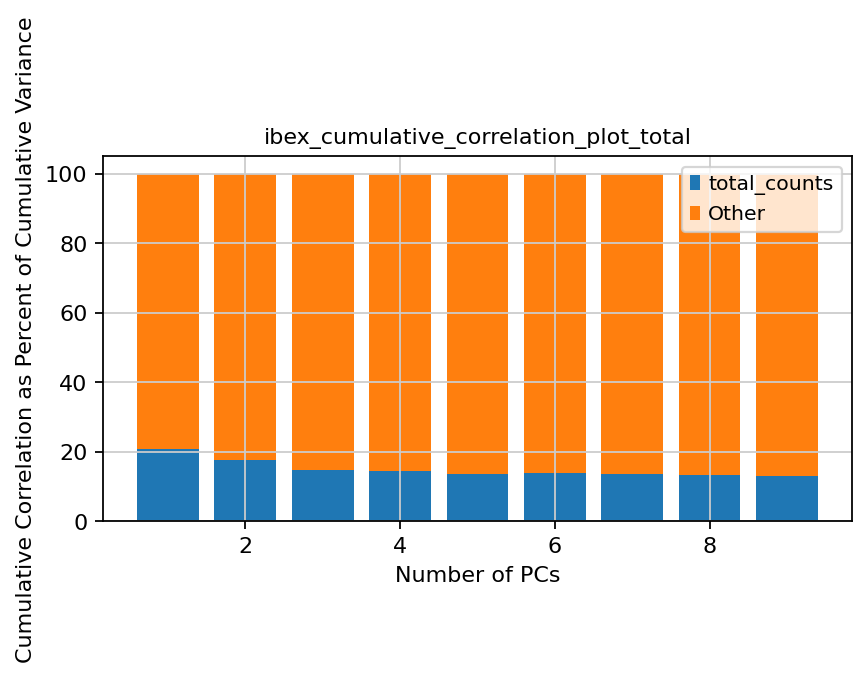

In [77]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

sc.set_figure_params(figsize=[6,3],fontsize=10)

# Define the observation name
obs_name1 = "total_counts"  # replace with your observation name

# Get the values of the observation
obs_values1 = adata_ibex.obs[obs_name1]

# Initialize variables to store the cumulative correlation and variance
cumulative_corr1 = 0
cumulative_variance = 0

# Initialize lists to store cumulative correlation as percent of cumulative variance
cum_corr_pct1 = []

# Calculate correlation with each PC
for i in range(9):
    pc_values = adata_ibex.obsm['X_pca'][:, i]

    # Pearson correlation
    corr1, _ = spearmanr(obs_values1, pc_values)

    # Get variance explained by this PC
    explained_variance = adata_ibex.uns['pca']['variance_ratio'][i]

    # Add weighted correlation and variance to cumulative measures
    cumulative_corr1 += np.abs(corr1) * explained_variance
    cumulative_variance += explained_variance

    # Store cumulative correlation as percent of cumulative variance
    cum_corr_pct1.append(100*cumulative_corr1/cumulative_variance)

# Create a stacked bar plot
plt.bar(range(1, 10), cum_corr_pct1, label=obs_name1)
plt.bar(range(1, 10), [100 - pct for pct in cum_corr_pct1], bottom=cum_corr_pct1, label='Other')
plt.title('ibex_cumulative_correlation_plot_total')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Correlation as Percent of Cumulative Variance')
plt.legend()

# Save the plot
plt.savefig('figures/ibex_cumulative_correlation_plot_total.pdf', dpi=300)

plt.show()

In [ ]:
sc.pp.neighbors(adata_ibex)
sc.tl.umap(adata_ibex)

/home/jovyan/my-conda-envs/imagespot/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# plot umap 
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=200)
sc.pl.umap(adata_ibex, color = ['cma_v2'],s=5, frameon = False, cmap = 'gist_rainbow',save='_sc_IBEX_cma_v2.pdf')
sc.pl.umap(adata_ibex, color = ['manual_bin_cma_v2'],s=5, frameon = False, cmap = 'gist_rainbow')


In [ ]:
sc.set_figure_params(figsize=[5,5],fontsize=10,dpi=150)
sc.pl.umap(adata_ibex, color = ['sample']
           , frameon = False, cmap = 'viridis',save='_IBEX_cs_meta_data.pdf')
sc.pl.umap(adata_ibex, color = ['annotation_lv_1']
           , frameon = False, groups=['HS','PVS'],s=20,save='_IBEX_sc_annotations_level_1.pdf')
sc.pl.umap(adata_ibex, color = ['annotation_lv_0']
           , frameon = False,s=5,save='_IBEX_sc_annotations_level_0.pdf')
